In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df_train = pd.read_csv('Datasets/train.csv', sep=',')
df_test = pd.read_csv('Datasets/test.csv', sep=',')
combine = pd.concat([df_train, df_test], axis=0, sort=False)
# display(combine[885:895])
combine[-5:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [61]:
df_train.shape, df_test.shape, combine.shape

((891, 12), (418, 11), (1309, 12))

In [62]:
df_train.info(), df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

(None, None)

**Title feature**

In [63]:
df_train['Name'].head(), df_train['Name'].tail()

(0                              Braund, Mr. Owen Harris
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...
 2                               Heikkinen, Miss. Laina
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
 4                             Allen, Mr. William Henry
 Name: Name, dtype: object, 886                       Montvila, Rev. Juozas
 887                Graham, Miss. Margaret Edith
 888    Johnston, Miss. Catherine Helen "Carrie"
 889                       Behr, Mr. Karl Howell
 890                         Dooley, Mr. Patrick
 Name: Name, dtype: object)

Extract the titles of each passenger

In [64]:
combine['Title'] = combine['Name'].str.extract(r'(\w+)\.', expand=True)
# combine['Title'].head(10), combine['Title'].tail(10)
df_train['Title'] = combine['Title'][:891]
df_test['Title'] = combine['Title'][891:]

Consider groupings of titles

In [65]:
combine['Title'].describe(), combine['Title'].value_counts()

(count     1309
 unique      18
 top         Mr
 freq       757
 Name: Title, dtype: object, Mr          757
 Miss        260
 Mrs         197
 Master       61
 Dr            8
 Rev           8
 Col           4
 Ms            2
 Major         2
 Mlle          2
 Sir           1
 Countess      1
 Dona          1
 Lady          1
 Mme           1
 Jonkheer      1
 Capt          1
 Don           1
 Name: Title, dtype: int64)

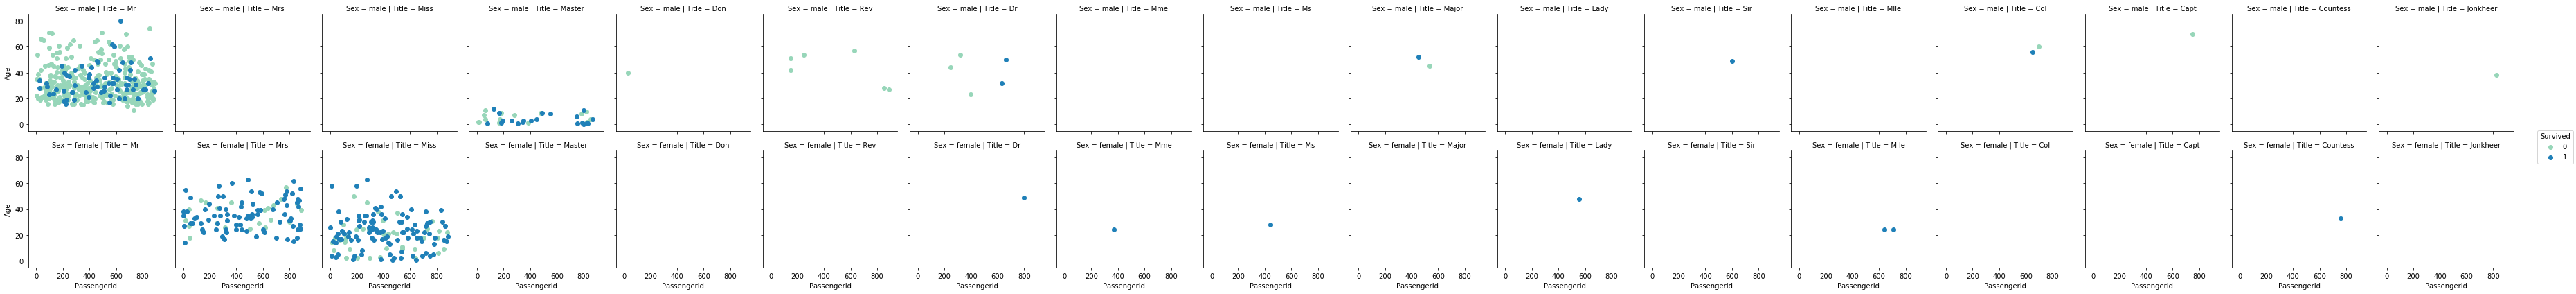

In [66]:
sns.set_palette('YlGnBu', 2)
g = sns.FacetGrid(df_train, col='Title', row='Sex', hue='Survived')
g = g.map(plt.scatter, 'PassengerId', 'Age')
g.add_legend()

Survival rate by Title  
Mr: Low  
Mrs: High  
Miss: High  
Master: Mixed  
Don: 1 0  
Rev: 6 0s  
Dr: Mixed  
Mme: 1 1  
Ms: 1 1  
Major: Mixed  
Lady: 1 1  
Sir: 1 1  
Mlle: 2 1s  
Col: Mixed  
Capt: 1 0  
Countess: 1 1  
Jonkheer: 1 0  

Other Notes:  
Mr has age floor of ~ 16  
Mrs has age floor of ~ 18  
Master has age roof of ~ 16  
Dr has 5 male and 1 female. Male survival is mixed and female survived

**Title groups**  
Mr, Don, Rev, Dr, Major, Sir, Col, Capt, Jonkheer  
Mrs, Miss, Mme, Ms, Lady, Mlle, Countess  
Master

In [67]:
Title_dict = {'Mr': 1, 'Don': 1, 'Rev': 1, 'Dr': 1, 'Major': 1, 'Sir': 1, 'Col': 1, 'Capt': 1, 'Jonkheer': 1,
             'Mrs': 2, 'Miss': 2, 'Mme': 2, 'Ms': 2, 'Lady': 2, 'Mlle': 2, 'Countess': 2,
             'Master': 3}

combine['Title_cat'] = combine['Title'].map(Title_dict)

combine['Title_cat'].value_counts()
df_train['Title_cat'] = combine['Title_cat'][:891]
df_test['Title_cat'] = combine['Title_cat'][891:]

In [68]:
def Title_cat_male(row):
    if row['Title_cat'] == 1:
        return 1
    else:
        return 0
def Title_cat_female(row):
    if row['Title_cat'] == 2:
        return 1
    else:
        return 0
def Title_cat_master(row):
    if row['Title_cat'] == 3:
        return 1
    else:
        return 0
combine['Title_cat_male'] = combine.apply(lambda x: Title_cat_male(x), axis=1)
combine['Title_cat_female'] = combine.apply(lambda x: Title_cat_female(x), axis=1)
combine['Title_cat_master'] = combine.apply(lambda x: Title_cat_master(x), axis=1)
df_train[['Title_cat_male', 'Title_cat_female', 'Title_cat_master']] = combine[['Title_cat_male', 'Title_cat_female', 'Title_cat_master']][:891]
df_test[['Title_cat_male', 'Title_cat_female', 'Title_cat_master']] = combine[['Title_cat_male', 'Title_cat_female', 'Title_cat_master']][891:]

One hot encoding for title categories

**Pclass**

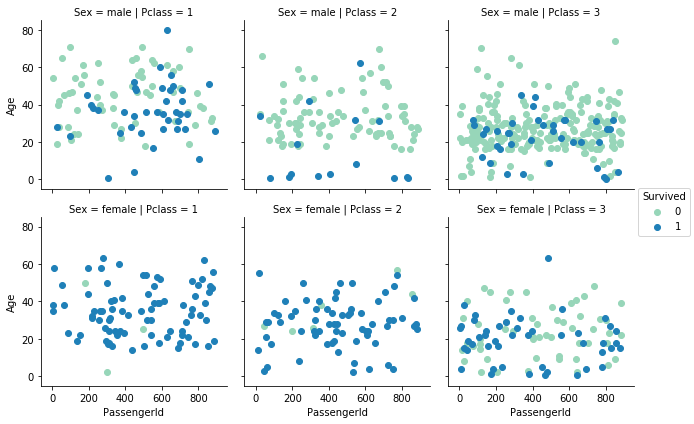

In [69]:
g = sns.FacetGrid(df_train, row='Sex', col='Pclass', hue='Survived')
g = g.map(plt.scatter, 'PassengerId', 'Age')
g.add_legend()

Men in first class have improved survival, but there is not a large difference between second and third.  
Women in first and second classes have greater survival than those in third.  

Most young passengers are in second or third class.

_Keep the Pclass feature as is_

In [70]:
def encode_Pclass_1(row):
    if row['Pclass'] == 1:
        return 1
    else:
        return 0
def encode_Pclass_2(row):
    if row['Pclass'] == 2:
        return 1
    else:
        return 0
def encode_Pclass_3(row):
    if row['Pclass'] == 3:
        return 1
    else:
        return 0
combine['Pclass_1'] = combine.apply(lambda x: encode_Pclass_1(x), axis=1)
combine['Pclass_2'] = combine.apply(lambda x: encode_Pclass_2(x), axis=1)
combine['Pclass_3'] = combine.apply(lambda x: encode_Pclass_3(x), axis=1)
df_train[['Pclass_1', 'Pclass_2', 'Pclass_3']] = combine[['Pclass_1', 'Pclass_2', 'Pclass_3']][:891]
df_test[['Pclass_1', 'Pclass_2', 'Pclass_3']] = combine[['Pclass_1', 'Pclass_2', 'Pclass_3']][891:]

One hot encoding for Pclass

In [71]:
df_train['Survived'].groupby([df_train['Pclass'], df_train['Sex']]).mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

**Embarked**

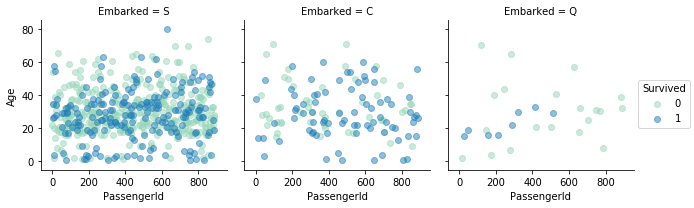

In [72]:
g = sns.FacetGrid(df_train, col='Embarked', hue='Survived')
g = g.map(plt.scatter, 'PassengerId', 'Age', alpha=.5)
g.add_legend()

In [73]:
df_train['Survived'].groupby(df_train['Embarked']).mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

Passengers embarking at C had the highest surivival rate.

Look at correlation of Embarked and Pclass.

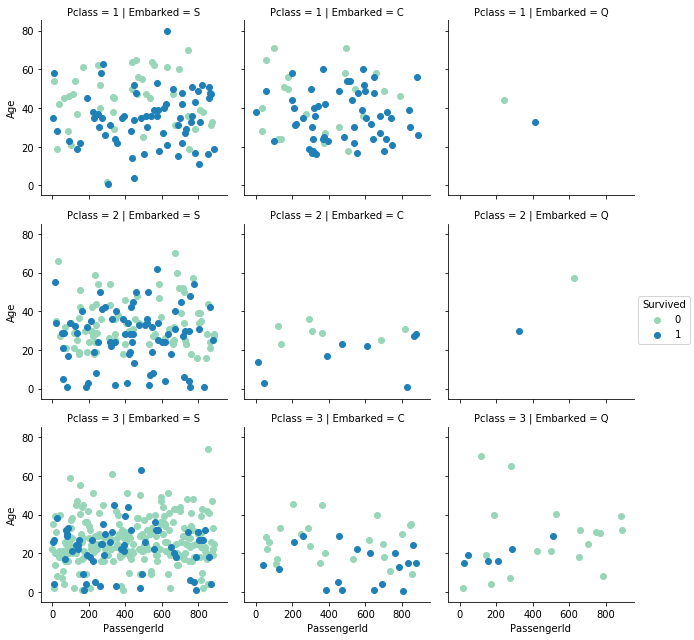

In [74]:
g = sns.FacetGrid(df_train, row='Pclass', col='Embarked', hue='Survived')
g = g.map(plt.scatter, 'PassengerId', 'Age')
g.add_legend()

In [75]:
pd.crosstab(df_train['Embarked'], df_train['Pclass'])

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


At Port C alone more passengers from Pclass 1 came aboard than from Pclass 3.  
Correlation between Embarked and Pclass might affect Survival.

In [76]:
def encode_Emb_C(row):
    if row['Embarked'] == 'C':
        return 1
    else:
        return 0
def encode_Emb_Q(row):
    if row['Embarked'] == 'Q':
        return 1
    else:
        return 0
def encode_Emb_S(row):
    if row['Embarked'] == 'S':
        return 1
    else:
        return 0
combine['Emb_C'] = combine.apply(lambda x: encode_Emb_C(x), axis=1)
combine['Emb_Q'] = combine.apply(lambda x: encode_Emb_Q(x), axis=1)
combine['Emb_S'] = combine.apply(lambda x: encode_Emb_S(x), axis=1)
df_train[['Emb_C', 'Emb_Q', 'Emb_S']] = combine[['Emb_C', 'Emb_Q', 'Emb_S']][:891]
df_test[['Emb_C', 'Emb_Q', 'Emb_S']] = combine[['Emb_C', 'Emb_Q', 'Emb_S']][891:]

**Fare**

In [77]:
combine['Fare'].isnull().sum()

1

In [78]:
combine[combine['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title_cat,Title_cat_male,Title_cat_female,Title_cat_master,Pclass_1,Pclass_2,Pclass_3,Emb_C,Emb_Q,Emb_S
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,...,1.0,1,0,0,0,0,1,0,0,1


Need to fill missing value for PassengerId 1044 in df_test

In [79]:
df_test[df_test['PassengerId'] == 1044]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title_cat,Title_cat_male,Title_cat_female,Title_cat_master,Pclass_1,Pclass_2,Pclass_3,Emb_C,Emb_Q,Emb_S
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,...,1.0,1,0,0,0,0,1,0,0,1


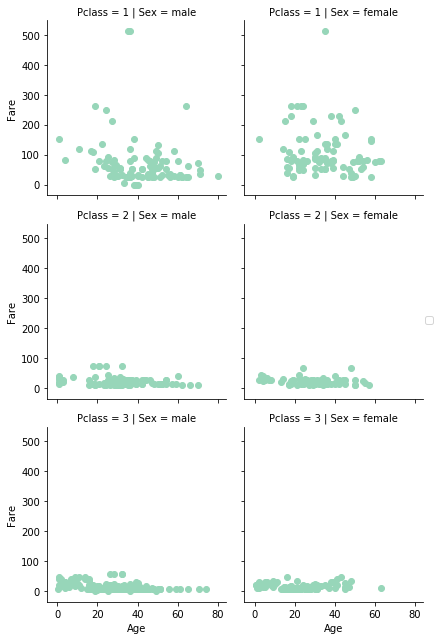

In [80]:
g = sns.FacetGrid(df_train, row='Pclass', col='Sex')
g = g.map(plt.scatter, 'Age', 'Fare')
g.add_legend()

Find average fare for male passengers of age 60 +- 5? in Pclass 3 and fill for missing value

In [81]:
fare_avg = combine['Fare'][(combine['Sex'] == 'male') & (combine['Pclass'] == 3) & (abs(combine['Age'] - 60) < 5)].mean()
fare_avg

7.179166666666667

In [105]:
combine['Fare'].fillna(fare_avg, inplace=True)
df_test = combine[891:]
# combine[combine['PassengerId'] == 1044].iloc[:, :10]

** SibSp + Parch **

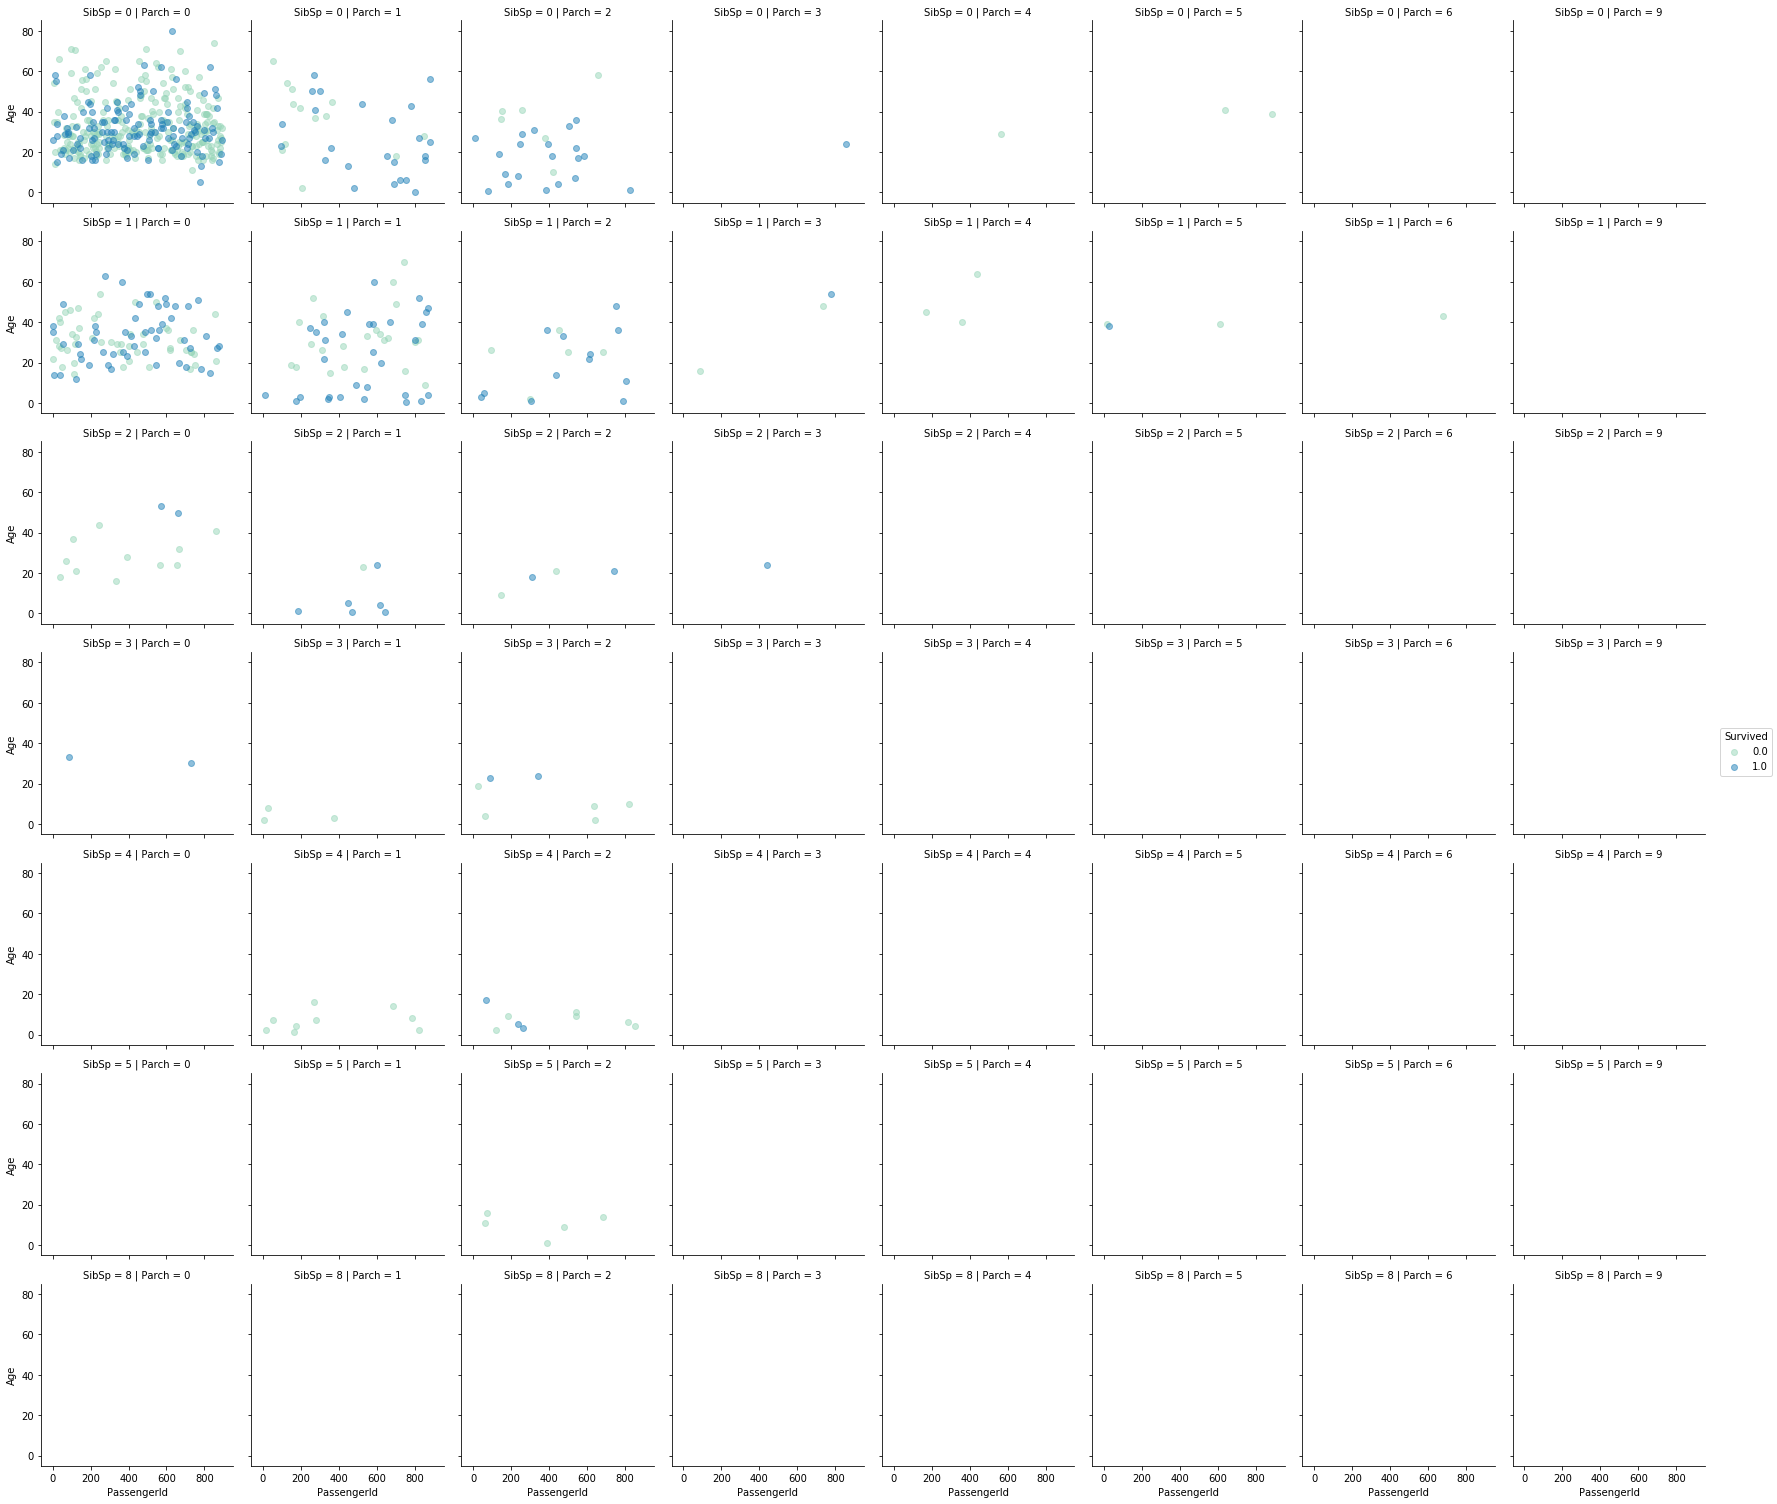

In [83]:
g = sns.FacetGrid(combine, row='SibSp', col='Parch', hue='Survived')
g = g.map(plt.scatter, 'PassengerId', 'Age', alpha=.5)
g.add_legend()

Make Family Size feature, total relatives on board

In [84]:
combine['Fam_Size'] = combine['SibSp'] + combine['Parch']
# combine[['Fam_Size', 'SibSp', 'Parch']].head()
df_train = combine[:891]
df_test = combine[891:]

In [85]:
df_train[['Survived']].groupby(by=df_train['Fam_Size']).agg(['mean', 'count'])

Survived      
              mean count
Fam_Size                
0         0.303538   537
1         0.552795   161
2         0.578431   102
3         0.724138    29
4         0.200000    15
5         0.136364    22
6         0.333333    12
7         0.000000     6
10        0.000000     7

Observations:  
* Singletons have lower survival than small families  
* Families of one or two have lower survival than families of three  
* Steep drop off in Surival after 3  

Conclusions:  
* Group Family Size feature into Singletons (0), Small Families (1-3), Large Families (>3)

In [86]:
def make_fsize(row):
    if row['Fam_Size'] == 0: # Singleton
        return 0
    elif row['Fam_Size'] <= 3: # Small Family
        return 1
    else: # Large Family
        return 2
combine['FSize_cat'] = combine.apply(make_fsize, axis=1)
df_train = combine[:891]
df_test = combine[891:]

/home/eric/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


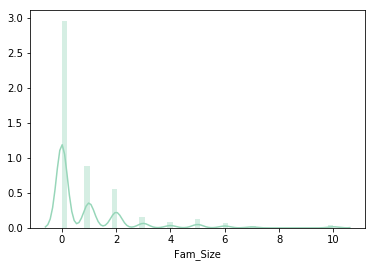

In [87]:
g = sns.distplot(df_train['Fam_Size'])

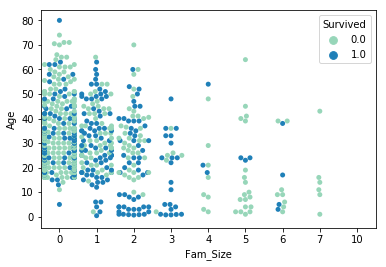

In [88]:
g = sns.swarmplot(x='Fam_Size', y='Age', hue='Survived', data=df_train)

**Fare Encoding**

/home/eric/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


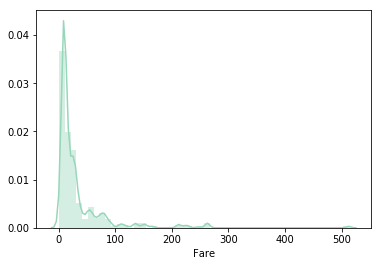

In [107]:
g = sns.distplot(combine['Fare'])

In [141]:
g = sns.scatterplot(df_train['PassengerId'], df_train['Fare'], hue=df_train['Survived'], alpha=.5)
g.add_legend()

AttributeError: module 'seaborn' has no attribute 'scatterplot'